In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# @title
from google.colab import userdata

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download fundal/students-annual-score-in-history-geography-subject

Dataset URL: https://www.kaggle.com/datasets/fundal/students-annual-score-in-history-geography-subject
License(s): CC0-1.0
students-annual-score-in-history-geography-subject.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip 'students-annual-score-in-history-geography-subject'

Archive:  students-annual-score-in-history-geography-subject.zip
replace Students Annual Score in History geography subject.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Students Annual Score in History geography subject.csv  


# Data Understanding

In [ ]:
df=pd.read_csv('/content/Students Annual Score in History geography subject.csv')

df.head()

,Gender,Test_01,Exam_01,Test_02,Exam_02,Test_03,Exam_03,Annual_Score,Success,Unnamed: 9
0,F,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1,NaN
1,F,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1,NaN
2,F,67.50,58.75,42.50,45.00,85.0,50.00,55.83,1,NaN
3,F,58.75,87.50,75.00,76.25,100.0,81.25,80.42,1,NaN
4,F,90.00,83.75,70.00,93.75,90.0,88.75,86.94,1,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        634 non-null    object 
 1   Test_01       634 non-null    float64
 2   Exam_01       634 non-null    float64
 3   Test_02       634 non-null    float64
 4   Exam_02       634 non-null    float64
 5   Test_03       634 non-null    float64
 6   Exam_03       634 non-null    float64
 7   Annual_Score  634 non-null    float64
 8   Success       634 non-null    int64  
 9   Unnamed: 9    0 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 49.7+ KB


Pada dataset ini memiliki sembilan fitur yang didapatkan dari penilaian siswa pada mata pelajaran History Geography di salah satu sekolah Algeria.

Dalam dataset terdapat 634 data penilaian siswa dengan fitur yang menjadi target prediksi adalah fitur Success yang menunjukkan kelulusan siswa terhadap mata pelajaran tersebut.


In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

Pada fitur Gender bertipe kategori yang menunjukkan jenis kelamin siswa dengan 'F' mewakili female atau wanita dan 'M' mewakili male atau pria.

In [ ]:
df['Success'].unique()

array([1, 0])

Pada fitur Success juga bertipe kategori bilangan biner yang menunjukkan apakah siswa lulus pada mata pelajaran atau tidak dengan '1' mewakili true atau lulus dan '0' mewakili false atau tidak lulus.

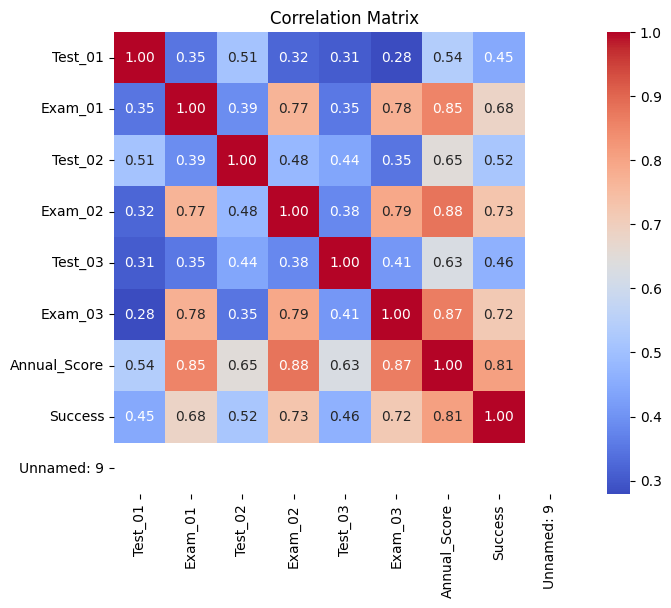

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = df[numeric_columns.columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

Berdasarkan grafik korelasi yang ditampilkan, fitur yang paling berpengaruh terhadap kelulusan siswa adalah nilai ujian (exam) dan skor tahunan (annual score). Ini menunjukkan bahwa nilai ujian memiliki pengaruh yang lebih signifikan dibandingkan dengan nilai tes (test) dalam menentukan kelulusan siswa. Temuan ini menegaskan pentingnya nilai ujian sebagai indikator utama dalam evaluasi keberhasilan akademis siswa.

# Data Preparation


Pada tahap data preparation bertujuan mempersiapkan data sebelum digunakan untuk pelatihan model. Pada tahap ini dilakukan beberapa langkah seperti:


1.   Penghapusan fitur yang tidak diperlukan
2.   Pemeriksaan data kosong (null values)
3. Pemeriksaan data duplikat
4. Penyesuaian tipe data
5. Pembagian data uji dan data latih



In [ ]:
df.drop(columns=['Unnamed: 9'],inplace=True)

In [ ]:
df.isnull().sum()

,0
Gender,0
Test_01,0
Exam_01,0
Test_02,0
Exam_02,0
Test_03,0
Exam_03,0
Annual_Score,0
Success,0


In [ ]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


In [ ]:
encoder = OneHotEncoder(sparse_output=False)

df['Gender'] = encoder.fit_transform(df[['Gender']])



df.head()

,Gender,Test_01,Exam_01,Test_02,Exam_02,Test_03,Exam_03,Annual_Score,Success
0,1.0,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1
1,1.0,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1
2,1.0,67.50,58.75,42.50,45.00,85.0,50.00,55.83,1
3,1.0,58.75,87.50,75.00,76.25,100.0,81.25,80.42,1
4,1.0,90.00,83.75,70.00,93.75,90.0,88.75,86.94,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        634 non-null    float64
 1   Test_01       634 non-null    float64
 2   Exam_01       634 non-null    float64
 3   Test_02       634 non-null    float64
 4   Exam_02       634 non-null    float64
 5   Test_03       634 non-null    float64
 6   Exam_03       634 non-null    float64
 7   Annual_Score  634 non-null    float64
 8   Success       634 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.7 KB


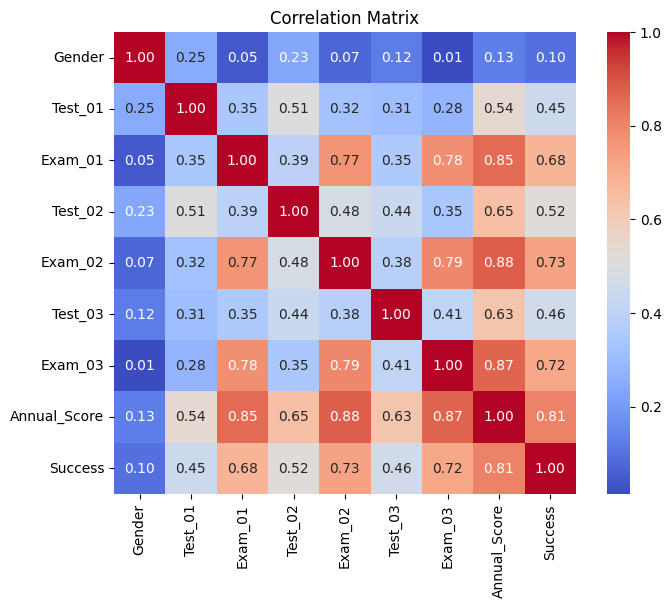

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = df[numeric_columns.columns].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

Setelah mengubah fitur Gender menjadi variabel numerik kategorikal, grafik korelasi yang dihasilkan menunjukkan bahwa gender memiliki pengaruh terendah terhadap kelulusan siswa. Hal ini mengindikasikan bahwa faktor gender tidak memiliki kontribusi yang signifikan dalam menentukan kelulusan siswa dibandingkan dengan fitur-fitur lainnya yang diuji.

In [ ]:
X = df.drop('Success', axis=1)
y = df['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

len(X_train), len(X_test)

(538, 96)

15% (96 data) dari data akan dialokasikan untuk pengujian, sementara 85% (538 data) sisanya akan digunakan untuk pelatihan.


# Modeling

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluasi

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.97      0.98        31

    accuracy                           0.99        96
   macro avg       0.99      0.98      0.99        96
weighted avg       0.99      0.99      0.99        96



In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        31

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[65  0]
 [ 1 30]]


 Pada hasil confusion matrix, menunjukkan bahwa model klasifikasi yang telah dibuat memiliki kinerja yang baik. Dari total 65 prediksi untuk kelas 0, semuanya benar, dan model berhasil mengidentifikasi 30 dari 31 prediksi untuk kelas 1 dengan tepat. Namun, ada satu kasus dari kelas 1 yang salah diklasifikasikan sebagai kelas 0.

In [ ]:
print(confusion_matrix(y_test, y_pred_xgb))

[[65  0]
 [ 0 31]]
